In [ ]:
pip install sktime

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [35]:
def get_bike_sharing_df():
    return pd.read_csv('hour.csv')

In [36]:
bike_sharing_df_full = get_bike_sharing_df()
bike_sharing_df_full.head(3)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [37]:
bike_sharing_df_full.shape

(17379, 17)

In [38]:
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import MaxNLocator

from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import (
    CutoffSplitter,
    ExpandingWindowSplitter,
    SingleWindowSplitter,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.utils.plotting import plot_series
from sktime.forecasting.compose import make_reduction

In [39]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [40]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import make_forecasting_scorer
from sktime.forecasting.naive import NaiveForecaster

In [41]:
listOfRegressors = [DecisionTreeRegressor(), RandomForestRegressor(n_estimators=24),
                   LinearRegression(), KNeighborsRegressor(n_neighbors=1), 
                   SVR()]

In [42]:
y = bike_sharing_df_full.cnt[:240]
y_train, y_test = temporal_train_test_split(y, test_size=48)
fh = list(range(1,49))



In [43]:
list_of_mse = []
list_of_mape = []

for regressor in listOfRegressors:
    reduced_reg = make_reduction(estimator = regressor, window_length=72)
    reduced_reg.fit(y_train)
    y_pred = reduced_reg.predict(fh)
    list_of_mse.append(mean_squared_error(y_test, y_pred))
    list_of_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    

In [44]:
list_of_mse, list_of_mape

([3194.1458333333335,
  1787.0959924768515,
  3491.3666307831973,
  1269.5416666666667,
  2326.6462420742987],
 [0.9179840022935363,
  1.1029829260431618,
  3.9474000207236912,
  0.8199886284953671,
  4.580330972926411])

In [55]:
regressor =  KNeighborsRegressor(n_neighbors=1)
reduced_reg_KNN = make_reduction(estimator = regressor, window_length=72)
reduced_reg_KNN.fit(y_train)
y_pred_KNN = reduced_reg_KNN.predict(fh)

In [50]:
regressor =  RandomForestRegressor(n_estimators=50)
reduced_reg_RF = make_reduction(estimator = regressor, window_length=72)
reduced_reg_RF.fit(y_train)
y_pred_RF = reduced_reg_RF.predict(fh)

In [51]:
regressor =  LinearRegression() #SVR()
reduced_reg_LR = make_reduction(estimator = regressor, window_length=72)
reduced_reg_LR.fit(y_train)
y_pred_LR = reduced_reg_LR.predict(fh)

Text(0, 0.5, 'Count')

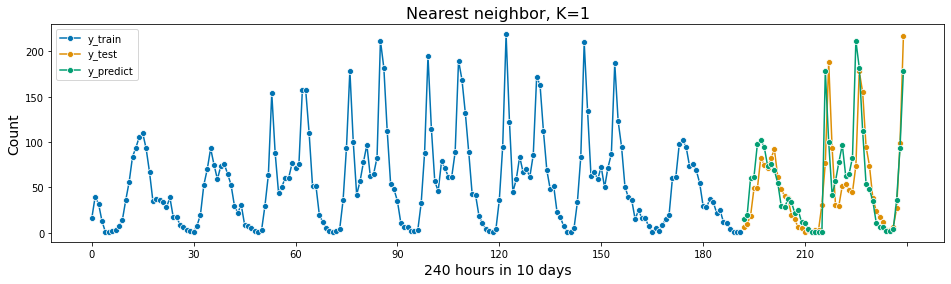

In [62]:
fig, ax = plot_series(y_train, y_test,y_pred_KNN, labels=["y_train", "y_test", "y_predict"])
plt.title('Nearest neighbor, K=1', fontsize=16)
plt.xlabel('240 hours in 10 days', fontsize=14)
plt.ylabel('Count', fontsize=14)

Text(0, 0.5, 'Count')

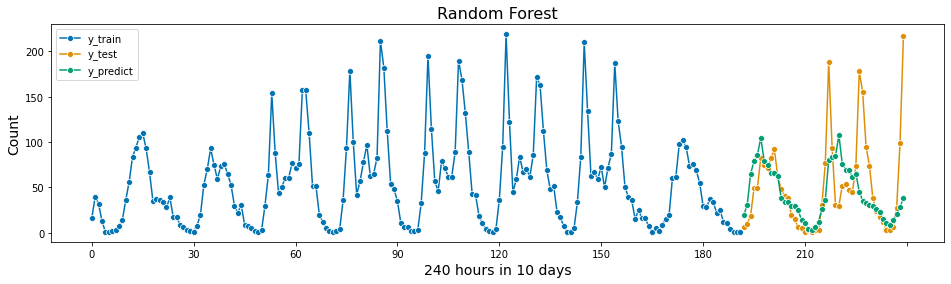

In [61]:
fig, ax = plot_series(y_train, y_test,y_pred_RF, labels=["y_train", "y_test", "y_predict"])
plt.title('Random Forest', fontsize=16)
plt.xlabel('240 hours in 10 days', fontsize=14)
plt.ylabel('Count', fontsize=14)

Text(0, 0.5, 'Count')

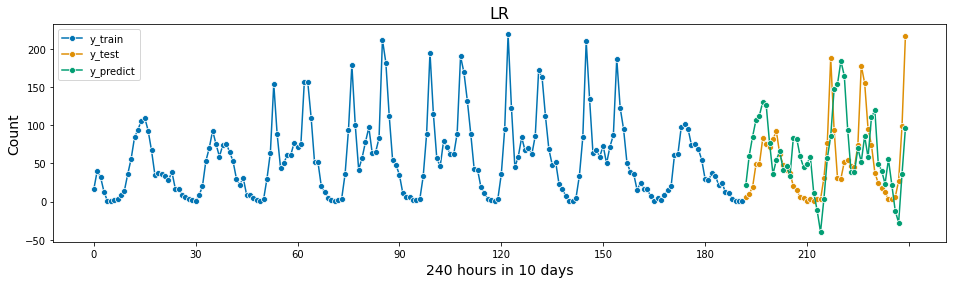

In [60]:
fig, ax = plot_series(y_train, y_test,y_pred_LR, labels=["y_train", "y_test", "y_predict"])
plt.title('LR', fontsize=16)
plt.xlabel('240 hours in 10 days', fontsize=14)
plt.ylabel('Count', fontsize=14)